In [68]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter,lfilter,filtfilt,spectrogram
import IPython
from IPython.display import Audio
import ipywidgets

w=wavfile.read(filename=r"c:\Users\Valentin\Documents\wav\v2\Безымянный (3).wav")
w=w[1][:,0]
framerate=44100
duration=w.shape[0]/framerate

def plotspec(signal, uselog=False, ax=plt, **kwargs):
    sp = np.abs(np.fft.fft(signal))
    if uselog: sp=np.log(sp)
    l=plt.plot(np.fft.fftfreq(signal.size,d=1/framerate), sp,**kwargs)
    plt.xlabel('Frequency, Hz')
    return l[0]

def showsig(signal):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plotspec(signal)
    plt.xlim([250, 400])
    plt.subplot(122)
    plt.plot(np.linspace(0,len(signal)/framerate, len(signal),endpoint=False),signal)
    plt.xlabel('Time, sec')
    plt.show()
    IPython.display.display(Audio(data=signal,rate=framerate))

def plotspecgram(signal, vmin, vmax=35, plt=plt):
    f,t,s=spectrogram(signal,fs=framerate,nperseg=2000, noverlap=1900,window='hann')

    s_log=np.log(s)

    plt.imshow(s_log,extent=[min(t),max(t),min(f),max(f)],origin='xy',aspect='auto', vmax=vmax, vmin=vmin, cmap='seismic')
    plt.set_xlabel('Time, sec')
    plt.set_ylabel('Frequency, Hz')

    plt.set_xlim(0, 3)
    plt.set_ylim(0, 2000)

## Pure tone

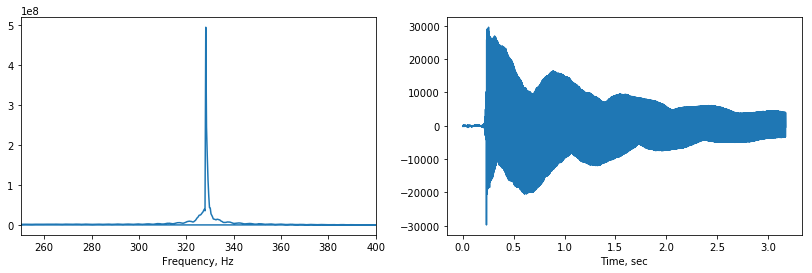

In [45]:
pure=w[128000:268000]
showsig(pure)

## Vibrato

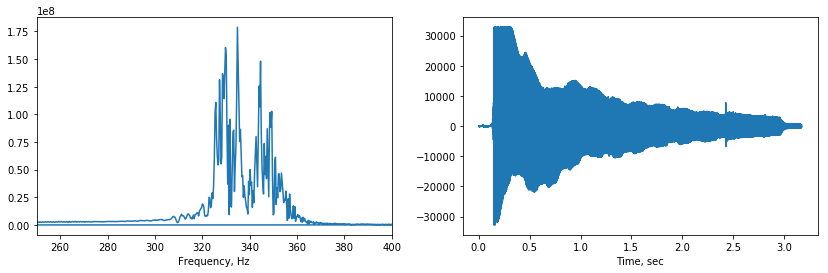

In [46]:
vibrato=w[630000:770000]
showsig(vibrato)

## Comparison

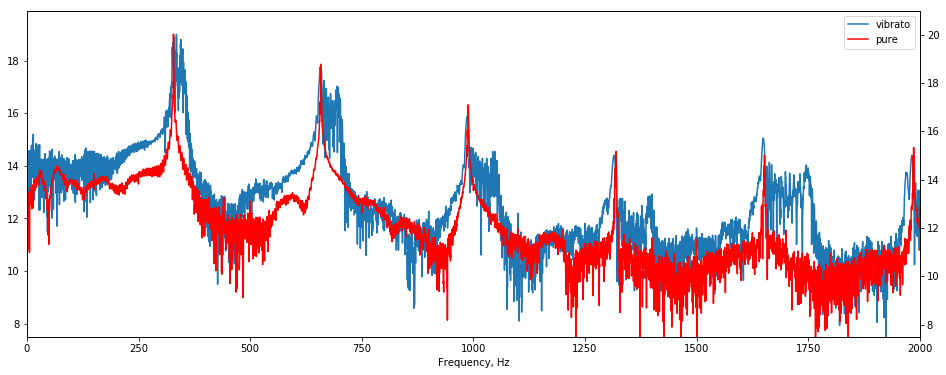

In [72]:
plt.figure(figsize=(16,6))
a=plt.gca()

l1=plotspec(vibrato,a)
plt.ylim(ymin=7.5)
a2=a.twinx()
l2=plotspec(pure,a2,c='r')
plt.xlim([0, 2000])
plt.ylim(ymin=7.5)
plt.legend([l1,l2],['vibrato','pure'])

plt.show()

## Pure tone spectrogram

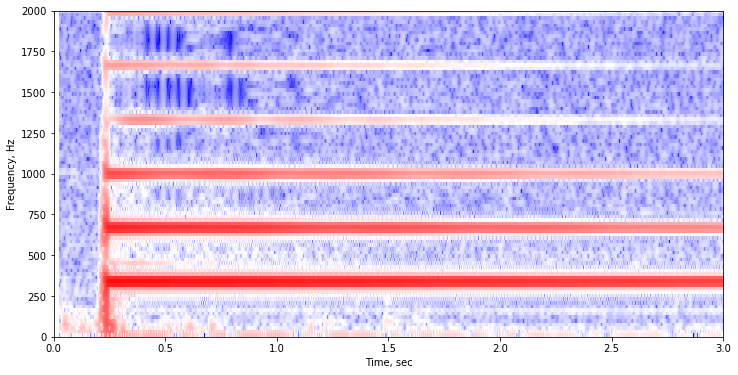

In [48]:
plt.figure(figsize=(12,6))
plotspecgram(pure,None,30,plt.gca())
plt.show()

## Vibrato spectrogram

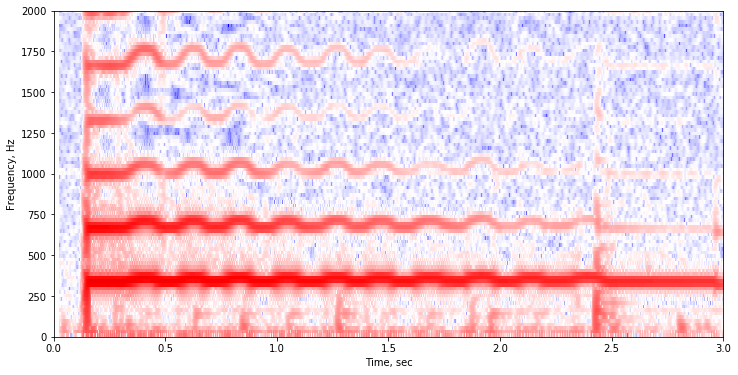

In [49]:
plt.figure(figsize=(12,6))
plotspecgram(vibrato,None,30,plt.gca())
plt.show()

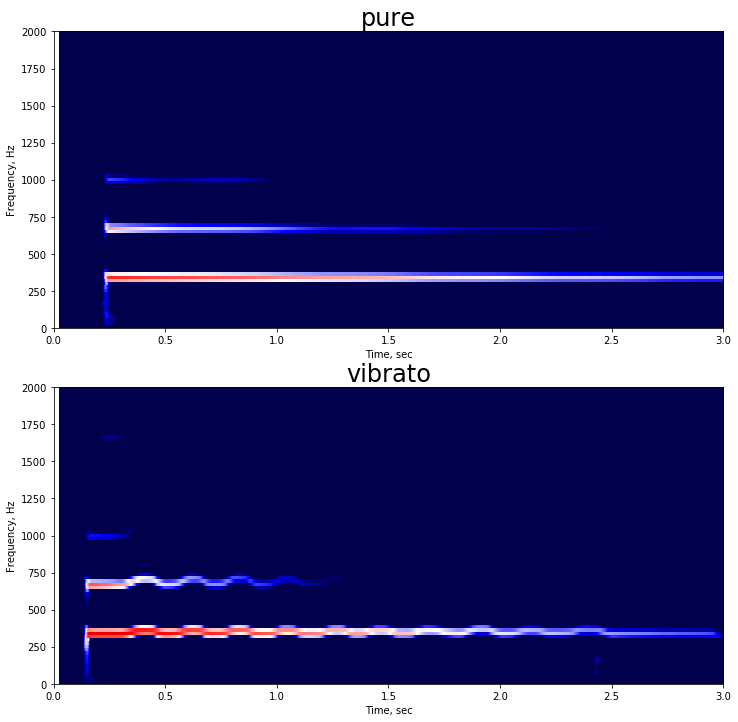

In [50]:
@ipywidgets.interact(vmin=(0,10,.1), vmax=(0,100,.1))
def plot(vmin=8.9,vmax=17.7):
    f,ax=plt.subplots(2,1,figsize=(12,12))
    plotspecgram(pure, vmin, vmax, ax[0])
    plotspecgram(vibrato, vmin, vmax, ax[1])
    ax[0].set_title('pure', fontsize=24)
    ax[1].set_title('vibrato', fontsize=24)
    plt.show()

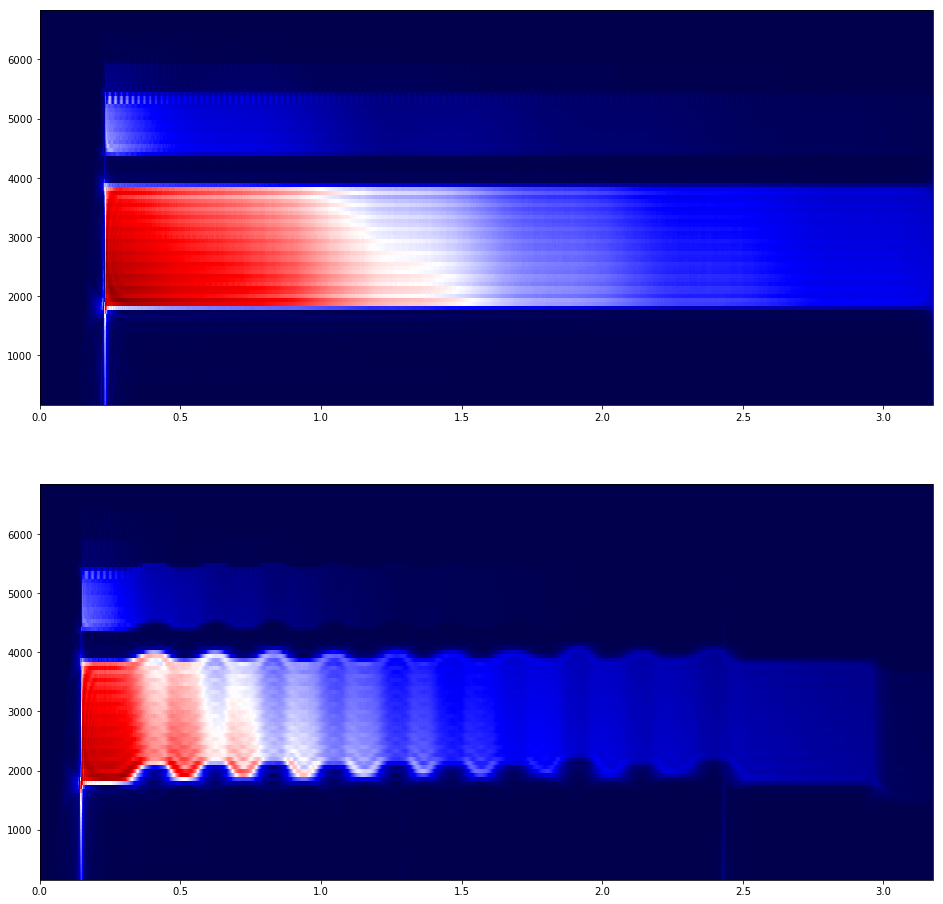

In [440]:
import pywt

@ipywidgets.interact(wlet=pywt.wavelist(kind='continuous'))
def plotwavelets(wlet='shan', calc_abs=True):
    global coef,freqs
    plt.figure(figsize=(16,16))

    pltnum=211
    for sig in [pure, vibrato]:
        coef, freqs=pywt.cwt(sig[:sig.size],np.linspace(5,220,100),wlet,sampling_period=1/framerate)
        plt.subplot(pltnum)
        pltnum+=1
        plt.imshow(np.abs(coef) if calc_abs else coef, 
                   aspect='auto', 
                   extent=[0,coef.shape[1]/framerate,min(freqs),max(freqs)], 
                   cmap='seismic')
    plt.show()

In [386]:
t=np.arange(0,.3,1/framerate)

In [420]:
mod_freqs=np.floor(np.linspace(0,10,t.size,endpoint=False))*20+400

In [424]:
s=np.sin(2*np.pi*mod_freqs*t)

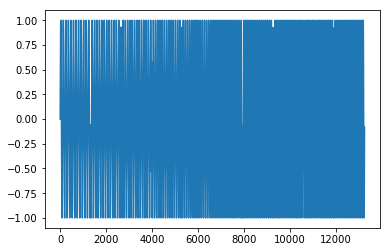

In [425]:
plt.plot(s)
plt.show()

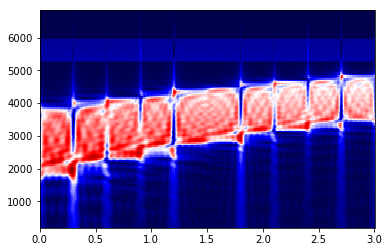

In [435]:
coef,freqs=pywt.cwt(s + .3*np.sin(2*np.pi*1200*t)  ,np.linspace(5,180,150),'shan',sampling_period=1/framerate)
plt.imshow(np.abs(coef), aspect='auto', extent=[0,coef.shape[1]/framerate*10,min(freqs),max(freqs)], cmap='seismic')
plt.show()

In [287]:
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']